# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset.  Your target variable is total sales revenue.  


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email


PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None # default='warn'
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [2]:
df = pd.read_csv('superstore_retail_orders.csv')
df.describe()

,order_id,quantity,product_price
count,56043.000000,56004.000000,56043.000000
mean,61668.410578,3.348582,6198.309433
std,7508.142486,422.654112,35784.965255
min,45079.000000,1.000000,2.290000
25%,55644.500000,1.000000,7.950000
50%,61870.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [5]:
df.columns

Index(['order_id', 'order_date', 'order_year_month', 'customer_name', 'city',
       'state_province', 'email', 'order_type', 'quantity', 'product_name',
       'product_line', 'product_price', 'product_status'],
      dtype='object')

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Create a total_amount variable, based on the product price and quantity

In [3]:
#Check for outliers. Remove any outliers that appear to be mistakes
df_clean = df[(df['order_date'] < '2024-06-30') & (df['order_year_month'] < '2024-06')]

# Convert any numbers into the correct datatype if they are not already numeric
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])
df_clean['order_year_month'] = pd.to_datetime(df_clean['order_year_month'])

# Convert any character variables in to factors if they are appropriate for that datatype
df_clean['product_status'] = df_clean['product_status'].astype('category')
df_clean['order_type'] = df_clean['order_type'].astype('category')

# Remove rows with empty (NULL) value
df_clean.dropna(inplace = True)

# Create a total_amount variable, based on the product price and quantity
df_clean['total_amount'] = df_clean['product_price'] * df_clean['quantity']


## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales Revenue

Create at least three charts showing revenue broken out by another variable.  

Each visualization should bring some insight into the total sales. You can use any variables for these sample plots.

<Axes: xlabel='state_province'>

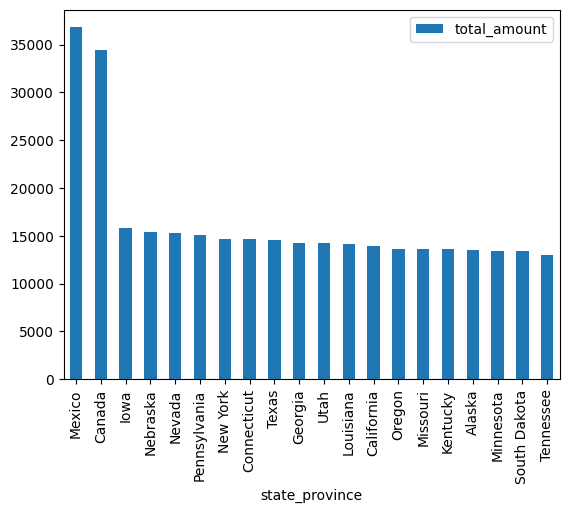

In [28]:
#chart 1: top 20 states/provvinces by revenue
top_states = df_clean[['total_amount', 'state_province']].groupby('state_province').mean('total_amount').sort_values(by=['total_amount'], ascending=False)
top_states.head(20).plot.bar()


<ipython-input-35-826a6a0a3185>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_type = df_clean[['order_type', 'total_amount']].groupby('order_type').mean('total_amount')


<Axes: ylabel='total_amount'>

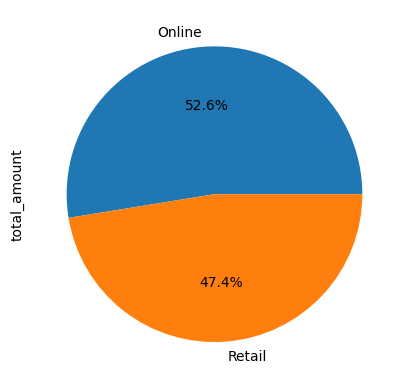

In [35]:
#chart 2: online vs retail order revenue
product_type = df_clean[['order_type', 'total_amount']].groupby('order_type').mean('total_amount')
product_type['total_amount'].plot.pie(autopct='%1.1f%%')

<Axes: xlabel='product_line'>

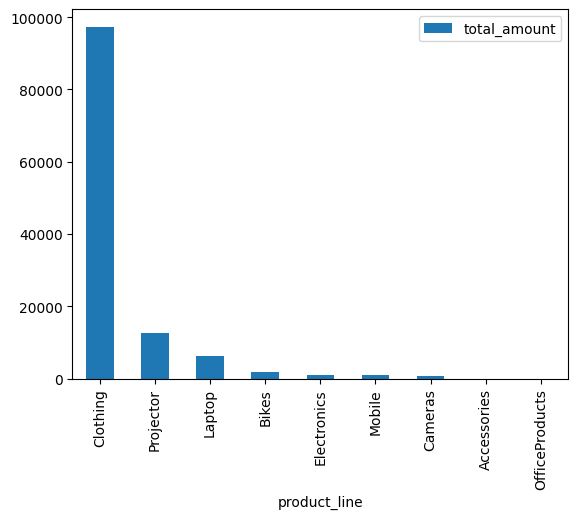

In [6]:
#chart 3: top revenue by product line
top_products = df_clean[['total_amount', 'product_line']].groupby('product_line').mean('total_amount').sort_values(by=['total_amount'], ascending=False)
top_products.head(20).plot.bar()